### Динар Шарафутдинов. Ozon Masters 2020

Данные с соревноания M5 Forecasting - Accuracy. Особенность данных в том, что они иерархичны. То есть есть данные по штатам, по магазинам, по типам продуктов + это временные данные, соответственно здесь большие возможности для визуализации. Данных очень много и можно бесконечное количество визуализаций придумать. Попробую изучить временные зависимости, в процессе буду писать идеи для более глубокого анализа

Данные с января 2011 по июнь 2016 года. Штаты: California, Texas, and Wisconsin

### Загрузим данные и сначала просто посмотрим на них

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('max_columns', 50)
plt.style.use('bmh')

In [2]:
inp = '../input/m5-forecasting-accuracy'
calend = pd.read_csv(f'{inp}/calendar.csv')
sales_train = pd.read_csv(f'{inp}/sales_train_validation.csv')
ss = pd.read_csv(f'{inp}/sample_submission.csv')
sell_prices = pd.read_csv(f'{inp}/sell_prices.csv')

In [3]:
sales_train.shape

(30490, 1919)

Основные данные - id товара с указанием магазина, категории и продаж по дням. 28 столбцов-дней необходимых предсказаний

In [4]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [6]:
calend.shape

(1969, 14)

Есть расшифровка дат, день недели и наличие специальных событий - праздников

In [7]:
calend.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [8]:
sell_prices.shape

(6841121, 4)

Здесь цены на товары по неделям для разных магазинов

In [9]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


### Что мы можем сделать? 


- посмотреть на отдельные товары 

- оценить тренд сумарных продаж за весь период

- посмотреть динамику продаж по определенным группам товаров - как в целом, так и по определенным срезам

- оценить различия продаж в разных штатах

- оценить зависимость от дня недели / месяца

- оценить влияние праздников на продажи**


### Выберем товар с наибольшими продажами в последний день

In [10]:
sales_train['id'][sales_train['d_1913'].max()]

'HOBBIES_1_135_CA_1_validation'

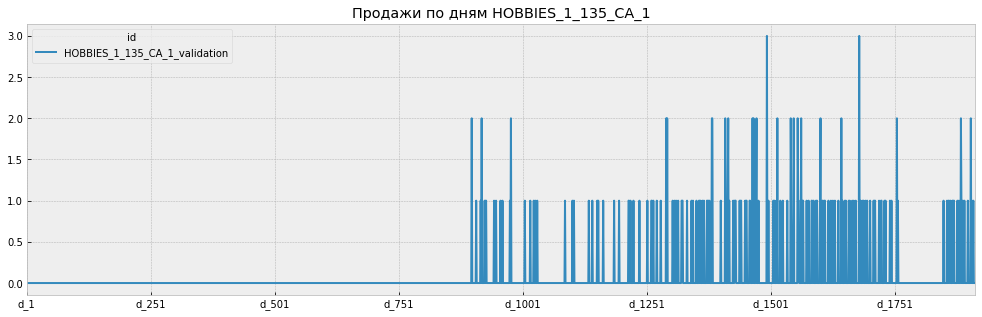

In [24]:
data_cols = [d for d in sales_train.columns if 'd_' in d]

sales_train.loc[sales_train['id'] == sales_train['id'][sales_train['d_1913'].max()]].set_index('id')[data_cols].T \
    .plot(figsize=(17, 5), title='Продажи по дням HOBBIES_1_135_CA_1')
plt.show()

Видим, что этот товар продаётся в очень небольших количествах (1-3 штуки в день). При этом на половине временного отрезка продаж нет вообще, что говорит нам о том, что есть проудкты, которые были введены в продажу не с начала временного отрезка

Сделаем так, чтобы отображались даты, а не номера дней

In [17]:
sales_train['id'][sales_train['d_1910'].max()]

'HOBBIES_1_080_CA_1_validation'

In [28]:
item = sales_train.loc[sales_train['id'] == sales_train['id'][sales_train['d_1910'].max()]][data_cols].T
item = item.reset_index().rename(columns={'index': 'd'}).merge(calend, how='left', validate='1:1')

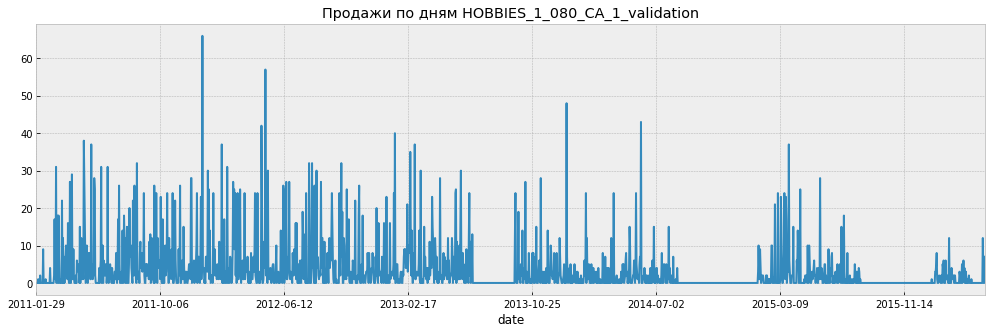

In [29]:
item.set_index('date').iloc[:, 1].plot(figsize=(17, 5), title='Продажи по дням HOBBIES_1_080_CA_1_validation')

Удалось найти и другой тип товара, который продаётся в больших количествах. Есть ощущение наличия некоторой сезонности, либо же периодов когда товара нет в наличии из-за неожиданных и длительных нулевых значений. В дальнейшем можно рассмотреть разные товары и попробовать разделить их на группы по динамике/размеру продаж

### Посмотрим на динамику продаж за весь период

In [30]:
total = sales_train[data_cols].T.sum(axis=1)
total = total.reset_index().rename(columns={'index': 'd'}).merge(calend, how='left', validate='1:1')
total

,d,0,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,32631,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,31749,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,23783,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,25412,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,19146,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,d_1909,35343,2016-04-20,11612,Wednesday,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
1909,d_1910,35033,2016-04-21,11612,Thursday,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
1910,d_1911,40517,2016-04-22,11612,Friday,7,4,2016,NaN,NaN,NaN,NaN,0,0,0
1911,d_1912,48962,2016-04-23,11613,Saturday,1,4,2016,NaN,NaN,NaN,NaN,0,0,0


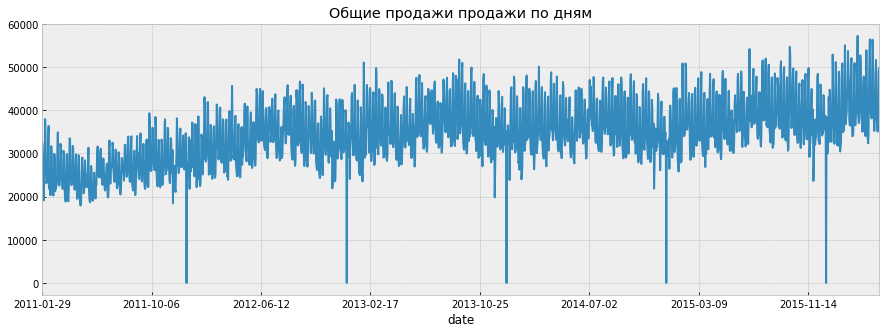

In [31]:
total.set_index('date').iloc[:, 1].plot(figsize=(15, 5), title='Общие продажи продажи по дням')

Есть тренд на рост продаж и цикличность на разных интервалах. Тренд очевидно нужно использовать для дальнейших предсказаний

### Всего у нас 3 категории товаров, посмотрим в целом на их продажи за весь период

In [32]:
categ = sales_train['cat_id'].unique()
print(categ)

['HOBBIES' 'HOUSEHOLD' 'FOODS']


In [34]:
full_sales = sales_train.set_index('id')[data_cols].T.merge(calend.set_index('d')['date'], 
        left_index=True, right_index=True, validate='1:1').set_index('date')

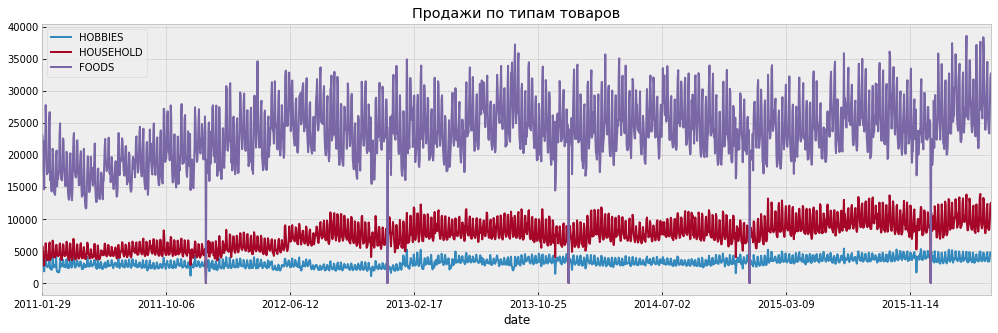

In [35]:
for i, cat in enumerate(categ):
    s_cat = sales_train.loc[sales_train['cat_id'] == cat][data_cols].sum(axis=0).to_frame(name='sum').merge(calend.set_index('d')['date'], 
        left_index=True, right_index=True, validate='1:1').set_index('date')
    if i == 0:
        s_fin = s_cat
    else:
        s_fin = s_fin.merge(s_cat, left_index=True, right_index=True, validate='1:1')
    s_fin.iloc[:, i].plot(figsize=(17, 5), title='Продажи по типам товаров')
 
plt.legend(categ)
plt.show()

Теперь точно видим, что есть сезенность. Более того, продажи сильно различаются по количеству. Например, продукты доминируют, а товары для хобби продаются в меньшем количестве. Ещё можно заметить цикличность на небольших интервалах (недели, месяцы?). Изучим это отдельно

Наблюдения начинаются 29 января 2011 года, посмотрим на 60 дней

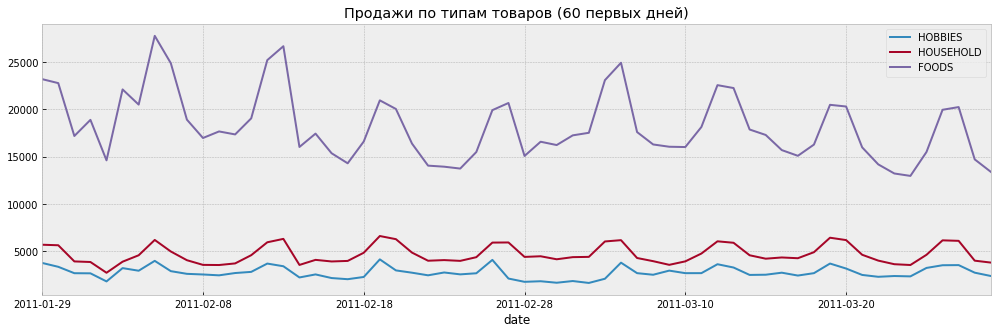

In [36]:
for i, cat in enumerate(categ):
    s_cat = sales_train.loc[sales_train['cat_id'] == cat][data_cols].sum(axis=0).to_frame(name='sum').merge(calend.set_index('d')['date'], 
        left_index=True, right_index=True, validate='1:1').set_index('date')
    if i == 0:
        s_fin = s_cat
    else:
        s_fin = s_fin.merge(s_cat, left_index=True, right_index=True, validate='1:1')
    s_fin.iloc[0:60, i].plot(figsize=(17, 5), title='Продажи по типам товаров (60 первых дней)')
        
plt.legend(categ)
plt.show()

Видим цикличность по неделям для всех групп товаров. Далее можно оценить это по дням недели. Вероятно, в выходные продажи выше чем в середине недели

### Сделаем такую же разбивку по продажам для каждого штата

In [37]:
states = sales_train['state_id'].unique()
print(states)

['CA' 'TX' 'WI']


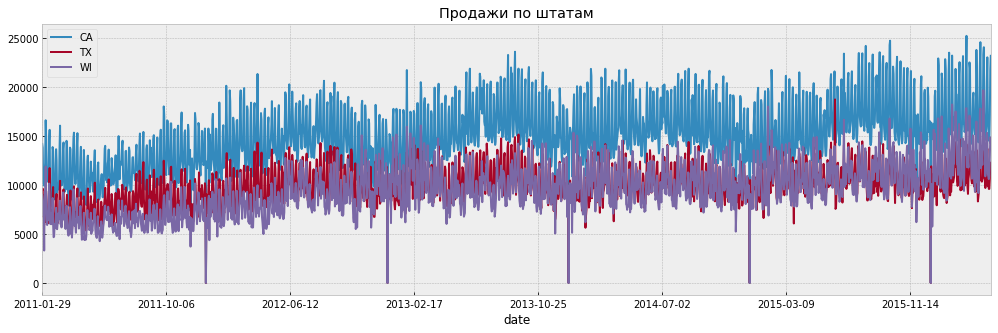

In [38]:
for i, cat in enumerate(states):
    s_cat = sales_train.loc[sales_train['state_id'] == cat][data_cols].sum(axis=0).to_frame(name='sum').merge(calend.set_index('d')['date'], 
        left_index=True, right_index=True, validate='1:1').set_index('date')
    if i == 0:
        s_fin = s_cat
    else:
        s_fin = s_fin.merge(s_cat, left_index=True, right_index=True, validate='1:1')
    s_fin.iloc[:, i].plot(figsize=(17, 5), title='Продажи по штатам')
        
plt.legend(states)
plt.show()

Видим, что по такой визуализации сложно что-то понять, воспользуемся усреднением. Например, интервалом в 90 дней

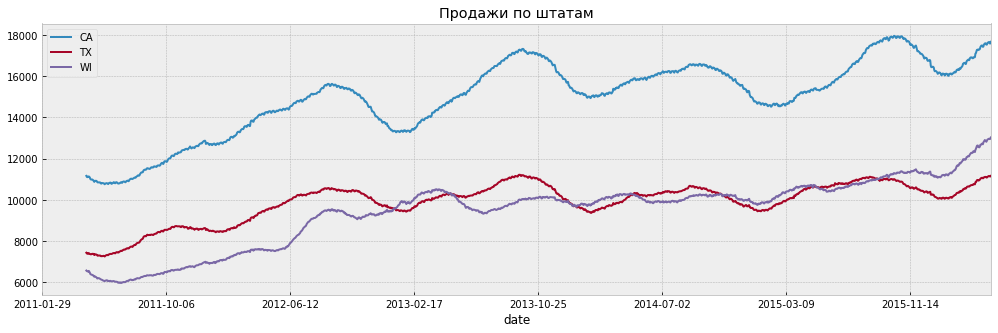

In [39]:
for i, cat in enumerate(states):
    s_cat = sales_train.loc[sales_train['state_id'] == cat][data_cols].sum(axis=0).to_frame(name='sum').merge(calend.set_index('d')['date'], 
        left_index=True, right_index=True, validate='1:1').set_index('date').rolling(90).mean()
    if i == 0:
        s_fin = s_cat
    else:
        s_fin = s_fin.merge(s_cat, left_index=True, right_index=True, validate='1:1')
    s_fin.iloc[:, i].plot(figsize=(17, 5), title='Продажи по штатам')
        
plt.legend(states)
plt.show()

Теперь лучше. Снова видна сезонность. Так, к октябрю-ноябрю продажи растут, а к февралю падают. Это может быть связанно с повышенным спросом на многие товары в конце года и большого количества праздников (день благодарения, рождество). При это Калифорния лидер по продажам, а два других штата имеют сопоставимые значения и динамику. За 2014 год видим стагнацию продаж. Это стоит изучить отдельно, поскольку может быть связано с экономической ситуаций в стране

Text(0, 0.5, 'Средние продажи')

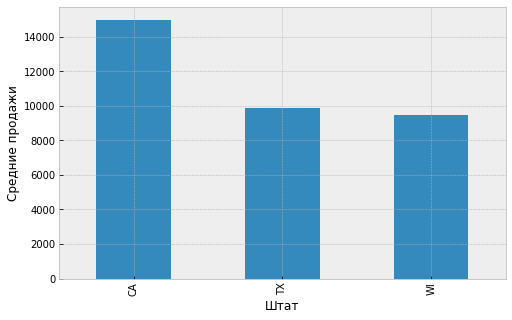

In [61]:
sales_train.groupby('state_id').sum().mean(axis=1).plot(kind='bar', figsize=(8, 5))
plt.xlabel('Штат')
plt.ylabel('Средние продажи')

Выводы подтверждаются. Можно ещё посмотреть на динамику соотношения по годам, но в целом по предыдущему графику видим, что соотношение сохраняется

### Рассмотрим продажи по дням недели и месяцам

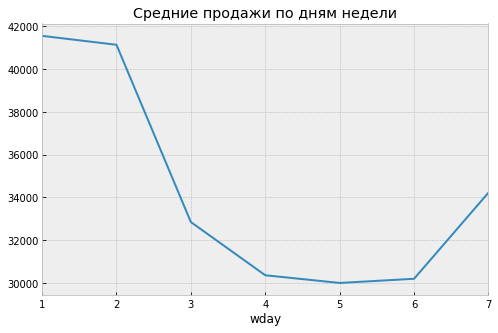

In [62]:
total.groupby('wday').mean().iloc[:, 0].plot(title='Средние продажи по дням недели', figsize=(8, 5))

Закономерно продажи растут в выходные дни (1 - Saturday, 2 - Sunday)

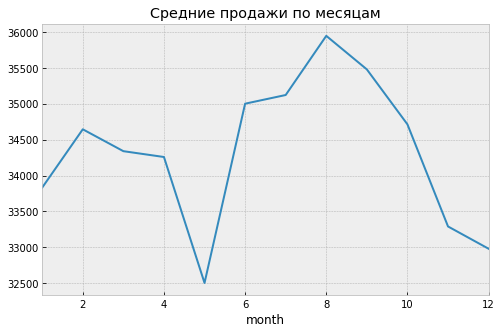

In [63]:
total.groupby('month').mean().iloc[:, 0].plot(title='Средние продажи по месяцам', figsize=(8, 5))

Видим пик в августе, затем достаточно высокие значения вплоть до октября. Затем снижение к декабрю, после этого небольшой рост к марту и дно в мае. Интересная зависимость, которая требует дополнительного изучения. Следует сравнить зависимости в разные годы, поскольку не совпадает с нашими первичными выводами по общему графику

Оценим влияние праздников на средние продажи в этот день

In [64]:
events = total['event_name_1'].unique()
print(events)

[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']


In [65]:
total.groupby(['event_name_1']).mean()[0].sort_values(ascending = False)

event_name_1
LaborDay               42154.600000
SuperBowl              40924.000000
Easter                 39517.600000
OrthodoxEaster         38277.000000
Father's day           36562.000000
Purim End              35957.000000
Eid al-Fitr            35267.600000
ColumbusDay            35164.800000
VeteransDay            35118.800000
Ramadan starts         34779.600000
EidAlAdha              34504.000000
PresidentsDay          34446.333333
Mother's day           34211.400000
IndependenceDay        33710.800000
NBAFinalsEnd           33564.200000
ValentinesDay          33495.666667
StPatricksDay          33459.666667
Pesach End             33450.200000
Chanukah End           33426.800000
MartinLutherKingDay    33378.600000
OrthodoxChristmas      33344.200000
Cinco De Mayo          32823.500000
MemorialDay            32699.600000
NBAFinalsStart         31874.400000
LentStart              30727.000000
Halloween              30059.400000
LentWeek2              29747.000000
NewYear        

Видим, что лидирующие праздники - LaborDay, SuperBowl, Easter.
При этом, судя по всему, магазины не работают в Рождество, поскольку продажи подозрительно низкие

Сравним со средними продажами не в праздники

In [66]:
total[total['event_type_1'].isnull()][0].mean()

34489.20750426379

Видим, что продажи не в праздники выше чем в половине праздничных дней. Что наводит на мысли о том, что во-первых, не во все праздники люди закупаются, во-вторых, что праздники не равносильны, в-третьих, что не обязательно люди будут закупаться в день праздника, то есть надо смотреть на интервал. Ещё имеет смысл посмотреть на продажи по праздникам по разным категориям, скорее всего есть значимые различия

In [82]:
prz = total[['d', 0, 'date', 'event_name_1']]
prz['5d_bef'] = 0
prz['ind'] = prz.index
prz = prz.fillna(0)

window = 5

for i in range(prz.shape[0]-(window + 1)):
    if prz['event_name_1'][i+window] != 0:
        prz['5d_bef'][i:i+window] = 1

prz;

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyda

In [83]:
prz['5d_bef'].value_counts()

0    1228
1     685
Name: 5d_bef, dtype: int64

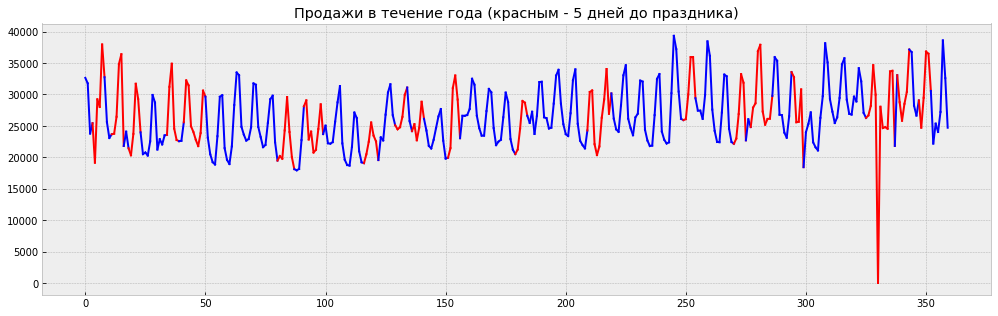

In [84]:
from matplotlib.pyplot import figure
figure(figsize=(17, 5))

for i in range(360-1):
    if prz['5d_bef'][i] == 0:
        plt.plot([prz['ind'][i], prz['ind'][i+1]], [prz[0][i], prz[0][i+1]], 'b')
    else:
        plt.plot([prz['ind'][i], prz['ind'][i+1]], [prz[0][i], prz[0][i+1]], 'r')
plt.title(label='Продажи в течение года (красным - 5 дней до праздника)')
plt.show()

Видим что предпраздничные дни почти всегда соответствуют пикам. Для более детального анализа стоит усреднить с небольшим интервалом и посмотреть на коротком промежутке времени. Наприме, месяц

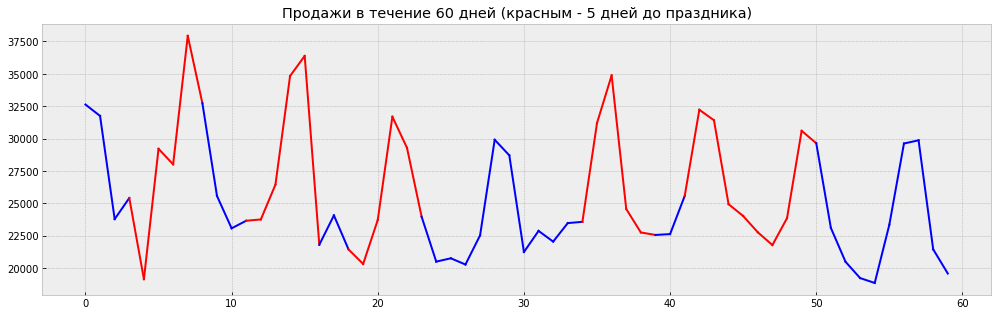

In [87]:
figure(figsize=(17, 5))
for i in range(60-1):
    if prz['5d_bef'][i] == 0:
        plt.plot([prz['ind'][i], prz['ind'][i+1]], [prz[0][i], prz[0][i+1]], 'b')
    else:
        plt.plot([prz['ind'][i], prz['ind'][i+1]], [prz[0][i], prz[0][i+1]], 'r')
plt.title(label='Продажи в течение 60 дней (красным - 5 дней до праздника)')
plt.show()

В течение двух месяцев праздники делают 5 пиков из 8 выше чем обычные выходные.

In [88]:
prz[0] = prz[0].rolling(7).mean()

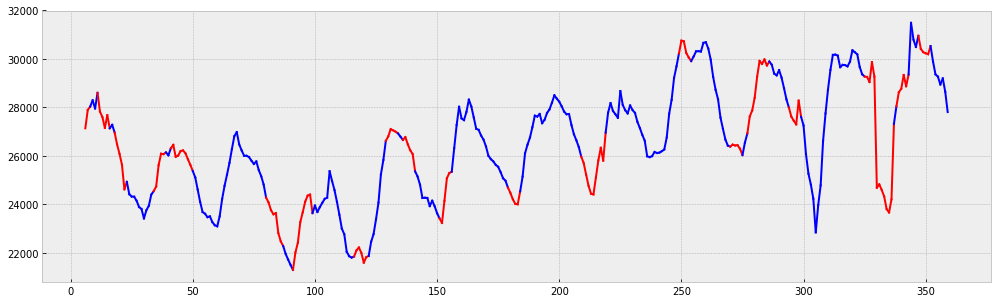

In [89]:
from matplotlib.pyplot import figure
figure(figsize=(17, 5))

for i in range(360-1):
    if prz['5d_bef'][i] == 0:
        plt.plot([prz['ind'][i], prz['ind'][i+1]], [prz[0][i], prz[0][i+1]], 'b')
    else:
        plt.plot([prz['ind'][i], prz['ind'][i+1]], [prz[0][i], prz[0][i+1]], 'r')
plt.show()

С усреднением уже видим, что праздники так же являются и катализатором роста продаж. Падение в конце можно не учитывать, ибо оно соответствует рождеству (выходной)

### Таким образом мы провели анализ временных данных и выявили ряд интересных закономерностей, на основе которых можно генерировать новые признаки и строить на них предсказательные модели